In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
alpha, alpha0, rho1, rho2, gamma = -120, 100, -12, 6, -7
theta_vec = [6, 6.2, 5.8]
user_vec = ['user_1', 'user_2', 'user_3']
df = pd.read_csv('optimization_pow_m.csv')
df

,theta,alpha,alpha0,rho1,rho2,gamma,user
0,5.009102,-109.607806,93.821746,-12.378137,6.013736,-5.849208,user_1
1,6.511415,-127.970617,102.008977,-12.333183,6.004290,-8.069030,user_1
2,6.483413,-122.401471,99.671776,-12.314913,6.003187,-7.924083,user_1
3,5.448129,-122.283805,98.899258,-12.362336,6.003619,-7.033581,user_1
4,6.168515,-125.013673,102.512756,-12.276106,6.003048,-7.441490,user_1
...,...,...,...,...,...,...,...
295,6.371205,-99.396928,73.383076,-12.335874,6.009968,-6.665867,user_3
296,6.003711,-121.022474,102.619483,-12.264606,6.003080,-7.514221,user_3
297,7.130694,-120.903989,97.320396,-12.390291,6.006696,-7.497956,user_3
298,5.703089,-120.976407,103.420686,-12.245575,6.003988,-7.706018,user_3


In [3]:
def plot_bootstrap_distribution(df, user_vec, theta_vec, alpha, alpha0, rho1, rho2, gamma, index):

    df_ = df[df.user == user_vec[index]].copy()
    params = [theta_vec[index], alpha, alpha0, rho1, rho2, gamma]
    
    if 'user' in df_.columns:
        df_.drop('user', inplace=True, axis=1)
    
    col = df_.columns
    n = len(df_)
    den = np.sqrt(n)
    se_ = []
    mean_ = []
    
    # Compute standard errors and means for each column
    for c in col:
        num = df_[c].std()
        se = num / den
        se_.append(se)
        
        mean = df_[c].mean()
        mean_.append(mean)
    
    # Print results and plot histograms
    nrows = 2
    nparams = len(params)
    ncols = int(np.ceil(nparams / nrows))
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 8))
    axes = axes.flatten()

    for i in range(nparams):
        print("=" * 30)
        print('Parameter Name:', col[i])
        print('The real parameter is:', params[i])
        print('The mean for the parameter is:', mean_[i])
        print('The SE for the parameter is:', se_[i])
        print("=" * 30)
        
        df_[col[i]].hist(ax=axes[i])
        axes[i].set_xlabel('Bootstrap')
        axes[i].set_ylabel('Frequency')
        axes[i].axvline(mean_[i], color='yellow', linewidth=4, label='Mean Param')
        axes[i].legend()
        axes[i].set_title(f"Distribution of {col[i]}")
    
    for j in range(nparams, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

Parameter Name: theta
The real parameter is: 6
The mean for the parameter is: 5.962312284376302
The SE for the parameter is: 0.0448498495556435
Parameter Name: alpha
The real parameter is: -120
The mean for the parameter is: -121.74923283804817
The SE for the parameter is: 0.8416833628884582
Parameter Name: alpha0
The real parameter is: 100
The mean for the parameter is: 100.26951325830413
The SE for the parameter is: 0.7131446670454362
Parameter Name: rho1
The real parameter is: -12
The mean for the parameter is: -12.319948027303488
The SE for the parameter is: 0.004497565821759627
Parameter Name: rho2
The real parameter is: 6
The mean for the parameter is: 6.0042466355963064
The SE for the parameter is: 0.00046565676766286074
Parameter Name: gamma
The real parameter is: -7
The mean for the parameter is: -7.266660969374986
The SE for the parameter is: 0.0621554511873109


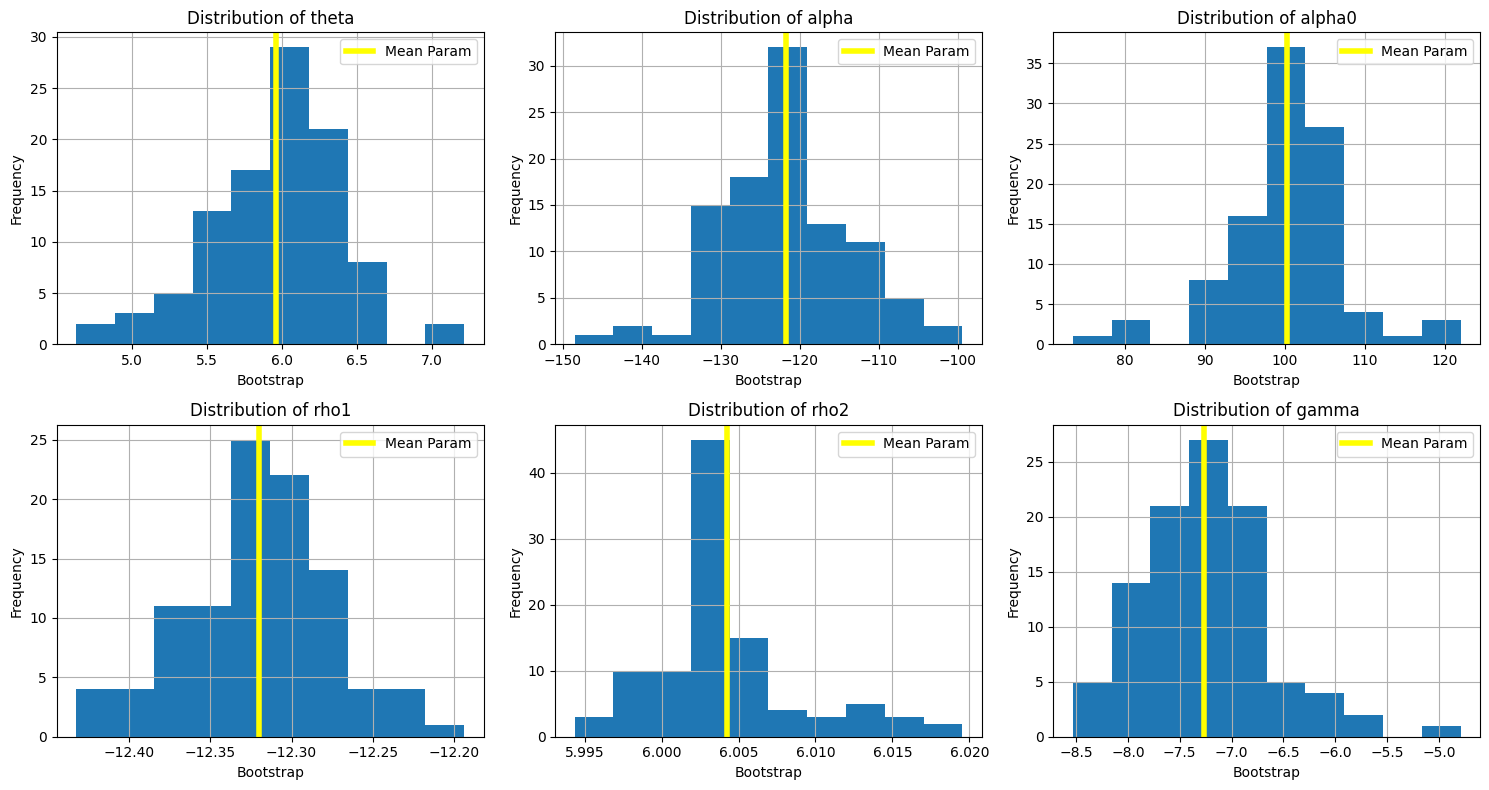

In [4]:
### user 1
plot_bootstrap_distribution(df, user_vec, theta_vec, alpha, alpha0, rho1, rho2, gamma, 0)

Parameter Name: theta
The real parameter is: 6.2
The mean for the parameter is: 5.98770516206901
The SE for the parameter is: 0.046039272486944456
Parameter Name: alpha
The real parameter is: -120
The mean for the parameter is: -121.88723740856005
The SE for the parameter is: 0.8784515468135426
Parameter Name: alpha0
The real parameter is: 100
The mean for the parameter is: 100.52843677151763
The SE for the parameter is: 0.762211873516562
Parameter Name: rho1
The real parameter is: -12
The mean for the parameter is: -12.33852752488466
The SE for the parameter is: 0.0050186113897703905
Parameter Name: rho2
The real parameter is: 6
The mean for the parameter is: 6.004003484398681
The SE for the parameter is: 0.0003959713739453277
Parameter Name: gamma
The real parameter is: -7
The mean for the parameter is: -7.2769685421577375
The SE for the parameter is: 0.06582726432624163


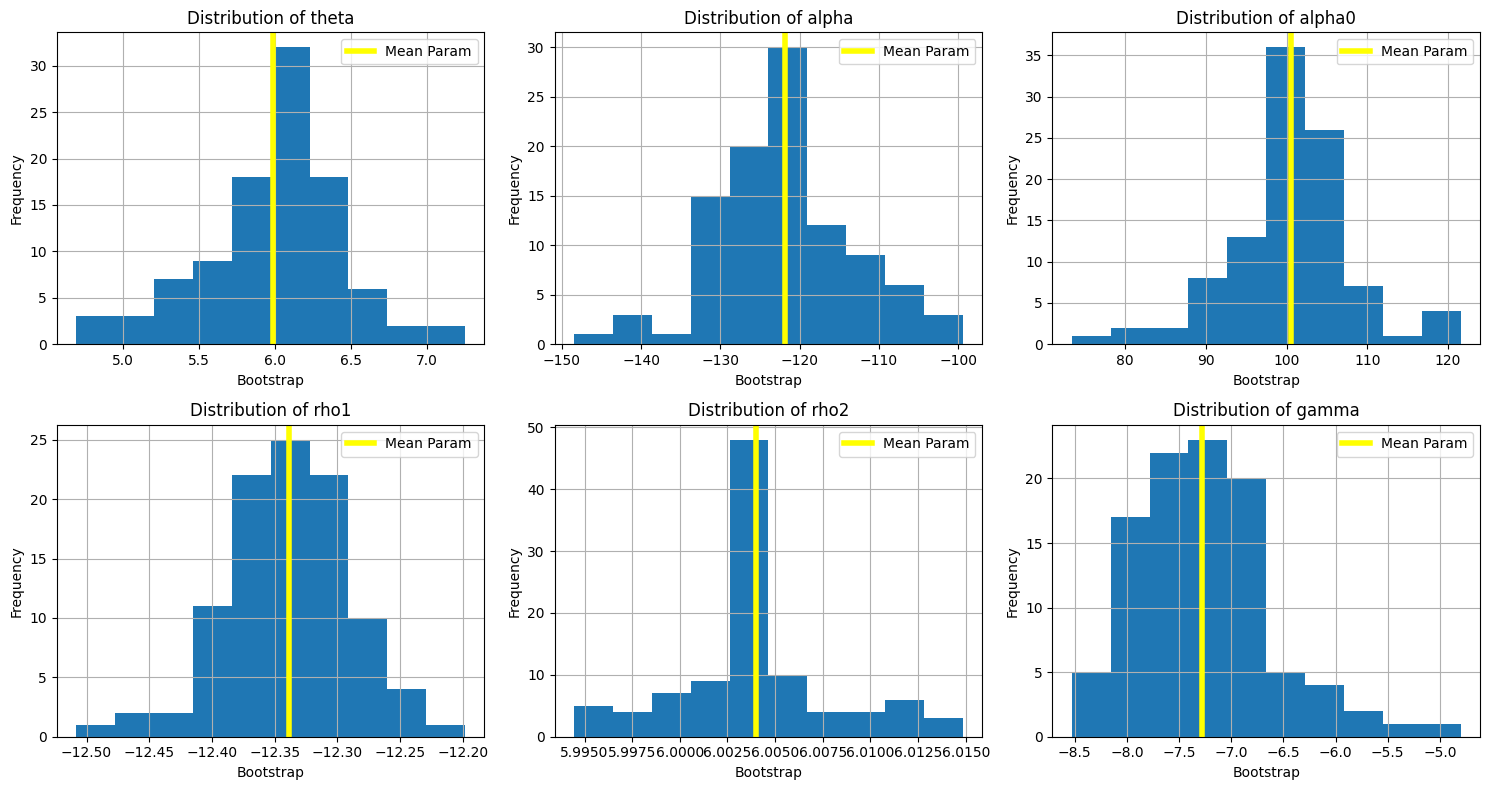

In [5]:
### user 2
plot_bootstrap_distribution(df, user_vec, theta_vec, alpha, alpha0, rho1, rho2, gamma, 1)

Parameter Name: theta
The real parameter is: 5.8
The mean for the parameter is: 5.987421897248482
The SE for the parameter is: 0.0486252475593244
Parameter Name: alpha
The real parameter is: -120
The mean for the parameter is: -121.72187719522158
The SE for the parameter is: 0.8507054193344405
Parameter Name: alpha0
The real parameter is: 100
The mean for the parameter is: 100.3778455607776
The SE for the parameter is: 0.7166773984158025
Parameter Name: rho1
The real parameter is: -12
The mean for the parameter is: -12.299322365123198
The SE for the parameter is: 0.004439104412219795
Parameter Name: rho2
The real parameter is: 6
The mean for the parameter is: 6.00431566239267
The SE for the parameter is: 0.0004443122043383652
Parameter Name: gamma
The real parameter is: -7
The mean for the parameter is: -7.281415594348146
The SE for the parameter is: 0.06555657807017931


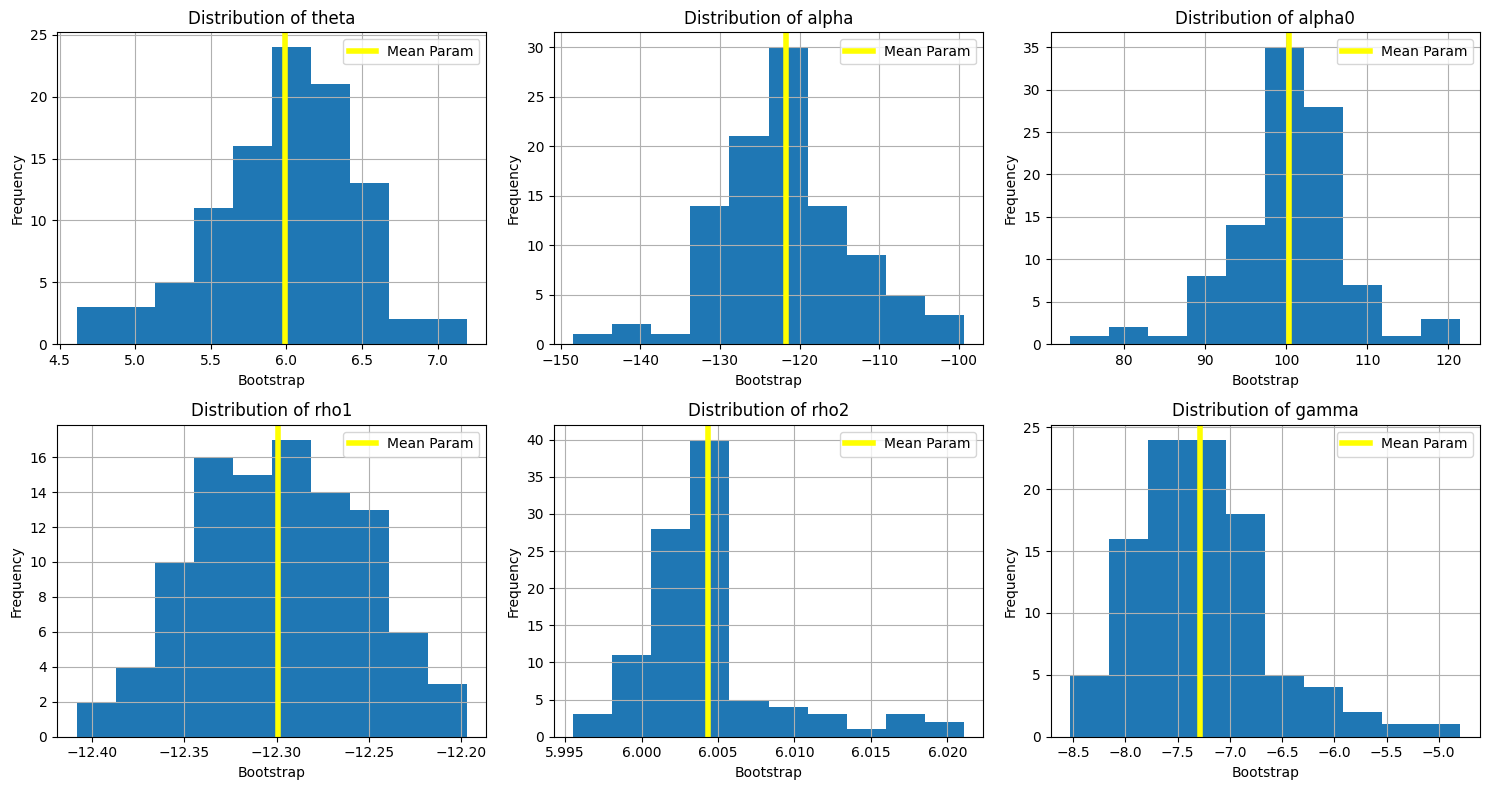

In [6]:
### user 3
plot_bootstrap_distribution(df, user_vec, theta_vec, alpha, alpha0, rho1, rho2, gamma, 2)